In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_path = '/content/drive/MyDrive/DCU/practicum/reddits/daily_titles_cleaned_train_with_date.csv'

In [3]:
import pandas as pd

df = pd.read_csv(folder_path)
df

,date,title
0,2017-12-18,whats problem ripple fork eligibility question...
1,2017-12-19,121717 weekly news crypto featuring litecoin c...
2,2017-12-20,bitfinex no longer accept new users doesnt boo...
3,2017-12-21,lol tx fees unbearable atm bitcoin cash spokes...
4,2017-12-22,market cap current value correlation not send ...
...,...,...
1750,2023-02-19,daily general discussion february 19 2023 gmt0...
1751,2023-02-20,bear call sell gold exchange tvc call price 18...
1752,2023-02-21,daily general discussion february 21 2023 gmt0...
1753,2023-02-22,mdb make defi better ultimate passive income d...


In [ ]:
import pandas as pd
import os

In [ ]:
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
file_list.sort()
len(file_list)

74

In [ ]:
dfs = []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
combined_df

,id,subreddit,author,title,selftext,created_utc,created_date
0,5lch52,Bitcoin,[deleted],Do I need to backup my wallet every time my bi...,[deleted],1483229027,NaN
1,5lch6f,Bitcoin,mr_robot-sh,How do you put a message in a block on the blo...,I remember reading somewhere about people putt...,1483229042,NaN
2,5lcion,Bitcoin,LolzNathan,Advice: Coinbase not worth touching due to the...,NaN,1483229564,NaN
3,5lcirp,btc,YoureFired555,I think I'm going to advise my latest commerci...,NaN,1483229588,NaN
4,5lcjms,Bitcoin,BitcoinRush,"Will BITCOIN put to shame Gold price (1 oc $1,...",NaN,1483229892,NaN
...,...,...,...,...,...,...,...
3143724,11eo3ak,CryptoMarkets,NaN,Official Twitter Account of Indian State Gover...,NaN,1677628286,2023-02-28 23:51:26
3143725,11eo6xb,CryptoCurrency,NaN,Ex-Biden Adviser Said Administration Was Pushi...,[removed],1677628546,2023-02-28 23:55:46
3143726,11eo7la,CryptoMarkets,NaN,Let's talk ICP - Interview with Austin Fathere...,NaN,1677628594,2023-02-28 23:56:34
3143727,11eo96s,CryptoCurrency,NaN,Would the integration of crypto into games lik...,I read some posts here in the subreddit today ...,1677628709,2023-02-28 23:58:29


In [ ]:
selected_columns_df = combined_df[['title', 'created_utc']]
selected_columns_df

,title,created_utc
0,Do I need to backup my wallet every time my bi...,1483229027
1,How do you put a message in a block on the blo...,1483229042
2,Advice: Coinbase not worth touching due to the...,1483229564
3,I think I'm going to advise my latest commerci...,1483229588
4,"Will BITCOIN put to shame Gold price (1 oc $1,...",1483229892
...,...,...
3143724,Official Twitter Account of Indian State Gover...,1677628286
3143725,Ex-Biden Adviser Said Administration Was Pushi...,1677628546
3143726,Let's talk ICP - Interview with Austin Fathere...,1677628594
3143727,Would the integration of crypto into games lik...,1677628709


In [ ]:
selected_columns_df.isnull().sum()

,0
title,36
created_utc,0


In [ ]:
cleaned_df = selected_columns_df.dropna()
cleaned_df.isnull().sum()


,0
title,0
created_utc,0


In [ ]:
cleaned_df.shape

(3143693, 2)

In [ ]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['created_utc'], unit='s').dt.date
cleaned_df = cleaned_df.set_index('date')
cleaned_df = cleaned_df.drop('created_utc', axis=1)
cleaned_df

/tmp/ipython-input-11-1688322820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date'] = pd.to_datetime(cleaned_df['created_utc'], unit='s').dt.date


,title
date,
2017-01-01,Do I need to backup my wallet every time my bi...
2017-01-01,How do you put a message in a block on the blo...
2017-01-01,Advice: Coinbase not worth touching due to the...
2017-01-01,I think I'm going to advise my latest commerci...
2017-01-01,"Will BITCOIN put to shame Gold price (1 oc $1,..."
...,...
2023-02-28,Official Twitter Account of Indian State Gover...
2023-02-28,Ex-Biden Adviser Said Administration Was Pushi...
2023-02-28,Let's talk ICP - Interview with Austin Fathere...


In [ ]:
daily_titles = cleaned_df.groupby('date')['title'].apply(' '.join).reset_index()
daily_titles

,date,title
0,2017-01-01,Do I need to backup my wallet every time my bi...
1,2017-01-02,2017 – The Year of Monetary Revolution Satoshi...
2,2017-01-03,8 years ago today the first bitcoin block was ...
3,2017-01-04,bitcoin breaks €1000 I didn't do my research a...
4,2017-01-05,How low Bitcoin would hit this time once this ...
...,...,...
2086,2023-02-24,"ntfs Daily General Discussion - February 24, 2..."
2087,2023-02-25,I tried the 'world's first crypto-backed energ...
2088,2023-02-26,Crypto Earnings Unlocked: 13 Surprising Ways t...
2089,2023-02-27,"Daily General Discussion - February 27, 2023 (..."


In [ ]:
before_df = daily_titles.copy()

In [ ]:
import re

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    text = re.sub(r"\s+", " ", text).strip()
    return text

In [ ]:
daily_titles['title'] = daily_titles['title'].apply(clean_text)

In [ ]:
daily_titles

,date,title
0,2017-01-01,do i need to backup my wallet every time my bi...
1,2017-01-02,2017 the year of monetary revolution satoshi w...
2,2017-01-03,8 years ago today the first bitcoin block was ...
3,2017-01-04,bitcoin breaks 1000 i didnt do my research and...
4,2017-01-05,how low bitcoin would hit this time once this ...
...,...,...
2086,2023-02-24,ntfs daily general discussion february 24 2023...
2087,2023-02-25,i tried the worlds first cryptobacked energy d...
2088,2023-02-26,crypto earnings unlocked 13 surprising ways to...
2089,2023-02-27,daily general discussion february 27 2023 gmt0...


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
custom_stopwords = set(stopwords.words('english'))
for word in ['not', 'no', 'nor', 'never', "don't", "didn't", "isn't", "wasn't"]:
    custom_stopwords.discard(word)

def clean_stopwords(text):
    words = word_tokenize(text)
    filtered = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered)

In [ ]:
daily_titles_cleaned = daily_titles['title'].apply(clean_stopwords)

In [ ]:
daily_titles_cleaned

,title
0,need backup wallet every time bitcoin balance ...
1,2017 year monetary revolution satoshi wills ha...
2,8 years ago today first bitcoin block mined mr...
3,bitcoin breaks 1000 didnt research sent 120 ci...
4,low bitcoin would hit time bubble bursts sorry...
...,...
2086,ntfs daily general discussion february 24 2023...
2087,tried worlds first cryptobacked energy drink t...
2088,crypto earnings unlocked 13 surprising ways ea...
2089,daily general discussion february 27 2023 gmt0...


In [ ]:
before_df.set_index('date', inplace=True)
daily_titles_cleaned.index = before_df.index
daily_titles_cleaned

,title
date,
2017-01-01,need backup wallet every time bitcoin balance ...
2017-01-02,2017 year monetary revolution satoshi wills ha...
2017-01-03,8 years ago today first bitcoin block mined mr...
2017-01-04,bitcoin breaks 1000 didnt research sent 120 ci...
2017-01-05,low bitcoin would hit time bubble bursts sorry...
...,...
2023-02-24,ntfs daily general discussion february 24 2023...
2023-02-25,tried worlds first cryptobacked energy drink t...
2023-02-26,crypto earnings unlocked 13 surprising ways ea...


In [ ]:
daily_titles_cleaned

,title
date,
2017-01-01,need backup wallet every time bitcoin balance ...
2017-01-02,2017 year monetary revolution satoshi wills ha...
2017-01-03,8 years ago today first bitcoin block mined mr...
2017-01-04,bitcoin breaks 1000 didnt research sent 120 ci...
2017-01-05,low bitcoin would hit time bubble bursts sorry...
...,...
2023-02-24,ntfs daily general discussion february 24 2023...
2023-02-25,tried worlds first cryptobacked energy drink t...
2023-02-26,crypto earnings unlocked 13 surprising ways ea...


In [ ]:
before_df

,title
date,
2017-01-01,Do I need to backup my wallet every time my bi...
2017-01-02,2017 – The Year of Monetary Revolution Satoshi...
2017-01-03,8 years ago today the first bitcoin block was ...
2017-01-04,bitcoin breaks €1000 I didn't do my research a...
2017-01-05,How low Bitcoin would hit this time once this ...
...,...
2023-02-24,"ntfs Daily General Discussion - February 24, 2..."
2023-02-25,I tried the 'world's first crypto-backed energ...
2023-02-26,Crypto Earnings Unlocked: 13 Surprising Ways t...


In [ ]:
from datetime import datetime

start_date = datetime.strptime("2017-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2023-02-28", "%Y-%m-%d")

total_days = (end_date - start_date).days + 1

total_days

2250

In [ ]:
all_dates = pd.date_range(start="2017-01-01", end="2023-02-28", freq="D")

existing_dates = before_df.index

missing_dates = all_dates.difference(existing_dates)

print(len(missing_dates))
print(missing_dates)

159
DatetimeIndex(['2017-02-09', '2017-02-10', '2017-02-11', '2017-02-12',
               '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16',
               '2017-02-17', '2017-02-18',
               ...
               '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', length=159, freq=None)


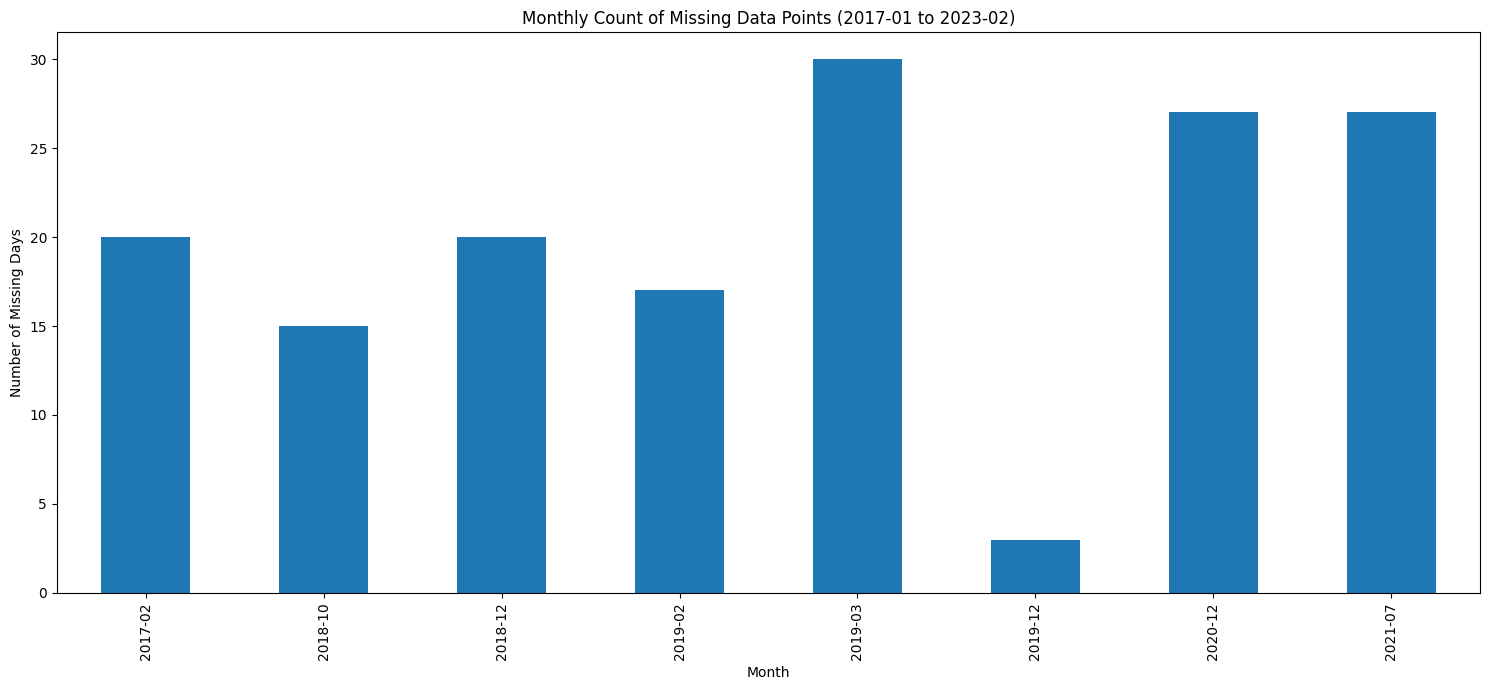

In [ ]:
import matplotlib.pyplot as plt

# Convert missing dates to a pandas Series and extract the month
missing_dates_series = pd.Series(missing_dates)
missing_dates_series_month = missing_dates_series.dt.to_period('M')

# Count the number of missing dates per month
missing_dates_monthly_counts = missing_dates_series_month.value_counts().sort_index()

# Plotting the monthly counts of missing data points
plt.figure(figsize=(15, 7))
missing_dates_monthly_counts.plot(kind='bar')
plt.title('Monthly Count of Missing Data Points (2017-01 to 2023-02)')
plt.xlabel('Month')
plt.ylabel('Number of Missing Days')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

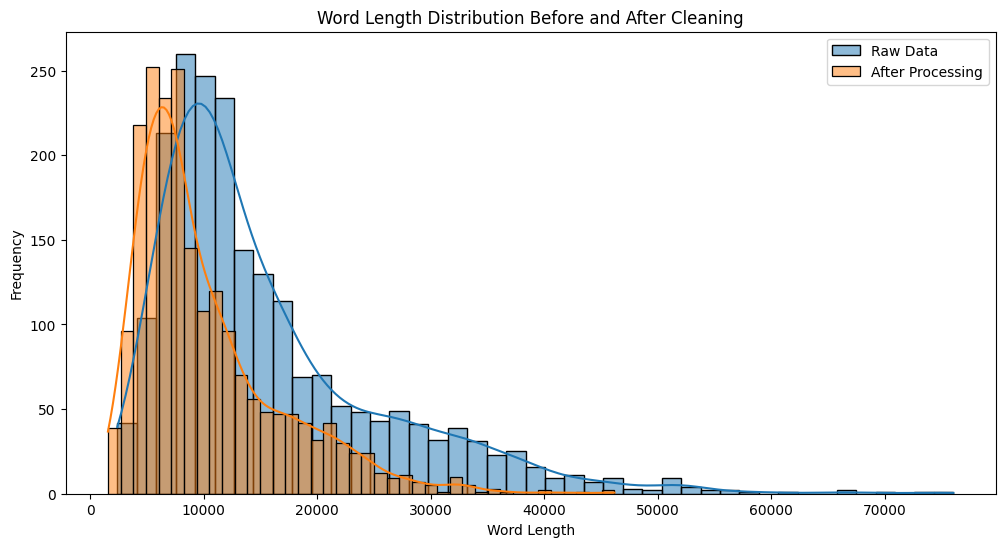

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate token lengths
before_df['token_length'] = before_df['title'].apply(lambda x: len(str(x).split()))
daily_titles_cleaned_lengths = daily_titles_cleaned.apply(lambda x: len(str(x).split()))

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distributions
sns.histplot(before_df['token_length'], color="#1f77b4", label="Raw Data", kde=True, ax=ax)
sns.histplot(daily_titles_cleaned_lengths, color="#ff7f0e", label="After Processing", kde=True, ax=ax)

# Add titles and labels
ax.set_title('Word Length Distribution Before and After Cleaning')
ax.set_xlabel('Word Length')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot
plt.show()


In [ ]:
daily_titles_cleaned

,title
date,
2017-01-01,need backup wallet every time bitcoin balance ...
2017-01-02,2017 year monetary revolution satoshi wills ha...
2017-01-03,8 years ago today first bitcoin block mined mr...
2017-01-04,bitcoin breaks 1000 didnt research sent 120 ci...
2017-01-05,low bitcoin would hit time bubble bursts sorry...
...,...
2023-02-24,ntfs daily general discussion february 24 2023...
2023-02-25,tried worlds first cryptobacked energy drink t...
2023-02-26,crypto earnings unlocked 13 surprising ways ea...


In [ ]:
before_df.head()

,title,token_length
date,,
2017-01-01,Do I need to backup my wallet every time my bi...,4092
2017-01-02,2017 – The Year of Monetary Revolution Satoshi...,5353
2017-01-03,8 years ago today the first bitcoin block was ...,4377
2017-01-04,bitcoin breaks €1000 I didn't do my research a...,7464
2017-01-05,How low Bitcoin would hit this time once this ...,7781


In [ ]:

# Ensure daily_titles_cleaned is a pandas Series
if isinstance(daily_titles_cleaned, pd.DataFrame):
    daily_titles_cleaned = daily_titles_cleaned.squeeze()

# Convert index to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(daily_titles_cleaned.index):
    daily_titles_cleaned.index = pd.to_datetime(daily_titles_cleaned.index)

# Define the start and end dates for filtering
start_date_filter = pd.to_datetime("2017-12-18")
end_date_filter = pd.to_datetime("2023-02-23")

# Filter the Series based on the index dates
daily_titles_cleaned_train = daily_titles_cleaned[(daily_titles_cleaned.index >= start_date_filter) & (daily_titles_cleaned.index <= end_date_filter)]

# Display the filtered Series
daily_titles_cleaned_train

,title
date,
2017-12-18,whats problem ripple fork eligibility question...
2017-12-19,121717 weekly news crypto featuring litecoin c...
2017-12-20,bitfinex no longer accept new users doesnt boo...
2017-12-21,lol tx fees unbearable atm bitcoin cash spokes...
2017-12-22,market cap current value correlation not send ...
...,...
2023-02-19,daily general discussion february 19 2023 gmt0...
2023-02-20,bear call sell gold exchange tvc call price 18...
2023-02-21,daily general discussion february 21 2023 gmt0...


In [ ]:
# Ensure the index is in the correct format (datetime)
daily_titles_cleaned_train.index = pd.to_datetime(daily_titles_cleaned_train.index).date

# Convert the Series to a DataFrame with the index as a column
daily_titles_cleaned_train_df = daily_titles_cleaned_train.reset_index()

# Rename the columns
daily_titles_cleaned_train_df.columns = ['date', 'title']

# Define the file path to save the DataFrame in Google Drive
save_path = '/content/drive/MyDrive/DCU/practicum/reddits/daily_titles_cleaned_train_with_date.csv'

# Save the DataFrame to a CSV file
daily_titles_cleaned_train_df.to_csv(save_path, index=False)

print(f"DataFrame saved to {save_path}")

DataFrame saved to /content/drive/MyDrive/DCU/practicum/reddits/daily_titles_cleaned_train_with_date.csv


In [ ]:
# Ensure daily_titles_cleaned is a pandas Series
if isinstance(daily_titles_cleaned, pd.DataFrame):
    daily_titles_cleaned = daily_titles_cleaned.squeeze()

# Convert index to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(daily_titles_cleaned.index):
    daily_titles_cleaned.index = pd.to_datetime(daily_titles_cleaned.index)

# Define the start and end dates for filtering
start_date_filter = pd.to_datetime("2017-12-18")
end_date_filter = pd.to_datetime("2023-02-23")

# Filter the Series based on the index dates
daily_titles_cleaned_train = daily_titles_cleaned[(daily_titles_cleaned.index >= start_date_filter) & (daily_titles_cleaned.index <= end_date_filter)]

# Convert the filtered Series to a DataFrame
daily_titles_cleaned_train_df_no_date = daily_titles_cleaned_train.reset_index(drop=True).to_frame()

# Rename the column
daily_titles_cleaned_train_df_no_date.columns = ['title']

# Define the file path to save the DataFrame in Google Drive
save_path_no_date = '/content/drive/MyDrive/DCU/practicum/reddits/daily_titles_cleaned_train_no_date.csv'

# Save the DataFrame to a CSV file without the index
daily_titles_cleaned_train_df_no_date.to_csv(save_path_no_date, index=False)

print(f"DataFrame without date saved to {save_path_no_date}")

DataFrame without date saved to /content/drive/MyDrive/DCU/practicum/reddits/daily_titles_cleaned_train_no_date.csv


In [ ]:
# Convert the index of daily_titles_cleaned_train to datetime objects if it's not already
if not pd.api.types.is_datetime64_any_dtype(daily_titles_cleaned_train.index):
    daily_titles_cleaned_train.index = pd.to_datetime(daily_titles_cleaned_train.index)

# Define the full date range for the specified period
full_date_range = pd.date_range(start="2017-12-18", end="2023-02-23", freq="D")

# Get the existing dates in the daily_titles_cleaned_train index
existing_dates_train = daily_titles_cleaned_train.index

# Find the dates that are in the full range but not in the existing dates
missing_dates_train = full_date_range.difference(existing_dates_train)

# Print the missing dates
print("Missing dates in daily_titles_cleaned_train from 2017-12-18 to 2023-02-23:")
if len(missing_dates_train) > 0:
    for date in missing_dates_train:
        print(date.date())
else:
    print("No missing dates found.")


Missing dates in daily_titles_cleaned_train from 2017-12-18 to 2023-02-23:
2018-10-17
2018-10-18
2018-10-19
2018-10-20
2018-10-21
2018-10-22
2018-10-23
2018-10-24
2018-10-25
2018-10-26
2018-10-27
2018-10-28
2018-10-29
2018-10-30
2018-10-31
2018-12-12
2018-12-13
2018-12-14
2018-12-15
2018-12-16
2018-12-17
2018-12-18
2018-12-19
2018-12-20
2018-12-21
2018-12-22
2018-12-23
2018-12-24
2018-12-25
2018-12-26
2018-12-27
2018-12-28
2018-12-29
2018-12-30
2018-12-31
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15
2019-03-16
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-29
2019-03-30
2019-03-31
2019-12-29
2019-12-30
2

In [ ]:
# Save the missing dates to a text file
missing_dates_file_path = '/content/drive/MyDrive/DCU/practicum/reddits/missing_dates_train.txt'

with open(missing_dates_file_path, 'w') as f:
    if len(missing_dates_train) > 0:
        for date in missing_dates_train:
            f.write(str(date.date()) + '\n')
    else:
        f.write("No missing dates found.\n")

print(f"Missing dates saved to {missing_dates_file_path}")

Missing dates saved to /content/drive/MyDrive/DCU/practicum/reddits/missing_dates_train.txt


In [ ]:
file_path_before = os.path.join(folder_path, 'combined_raw_2017-2023.csv')
before_df.to_csv(file_path_before)

In [ ]:
file_path_after = os.path.join(folder_path, 'combined_processed_2017-2023.csv')
daily_titles_cleaned.to_csv(file_path_after)